In [1]:
# Import the usual suspects....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


import pandas_datareader as pdr
import datetime as dt
import quandl


import pandas as pd
import numpy as np
import requests
from termcolor import colored as cl
from math import floor
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')


import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'



Bad key "text.kerning_factor" on line 4 in
C:\Users\44nas\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import alpaca_trade_api as tradeapi
from dotenv import load_dotenv
import os
import pandas as pd

from get_api_df import *

In [3]:
ticker = get_api_df()

Python-dotenv could not parse statement starting at line 11


In [4]:
ticker.tail()

,open,high,low,close,volume
time,,,,,
2021-06-28 00:00:00-04:00,133.42,135.245,133.350,134.75,53815255
2021-06-29 00:00:00-04:00,134.82,136.490,134.350,136.33,55081959
2021-06-30 00:00:00-04:00,136.17,137.410,135.870,136.94,51014239
2021-07-01 00:00:00-04:00,136.60,137.330,135.760,137.27,46267213
2021-07-02 00:00:00-04:00,137.92,140.000,137.745,139.96,69160944


In [5]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    ticker[col] = ticker['close'].shift(lag)
    cols.append(col)
ticker.dropna(inplace=True)

In [6]:
reg = np.linalg.lstsq(ticker[cols], ticker['close'], rcond=None)[0]
reg

array([ 0.84543007,  0.12049849,  0.03644919,  0.2887051 , -0.29033496])

In [7]:
ticker['prediction'] = np.dot(ticker[cols], reg)

In [8]:
ticker.tail(5)

,open,high,low,close,volume,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
time,,,,,,,,,,,
2021-06-28 00:00:00-04:00,133.42,135.245,133.350,134.75,53815255,133.11,133.40,133.70,133.97,132.29,133.752363
2021-06-29 00:00:00-04:00,134.82,136.490,134.350,136.33,55081959,134.75,133.11,133.40,133.70,133.97,134.527276
2021-06-30 00:00:00-04:00,136.17,137.410,135.870,136.94,51014239,136.33,134.75,133.11,133.40,133.70,136.041882
2021-07-01 00:00:00-04:00,136.60,137.330,135.760,137.27,46267213,136.94,136.33,134.75,133.11,133.40,136.811134
2021-07-02 00:00:00-04:00,137.92,140.000,137.745,139.96,69160944,137.27,136.94,136.33,134.75,133.11,137.778893


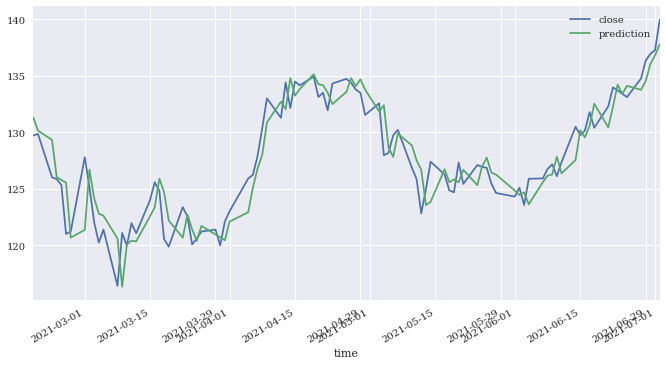

In [9]:
ticker[ [ 'close', 'prediction'] ].plot(figsize=(10, 6))

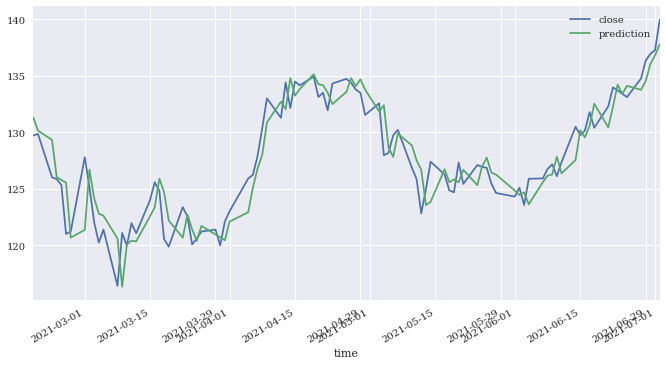

In [10]:
ticker[['close', 'prediction']].loc['2019-10-1':].plot(figsize=(10, 6))

In [11]:
ticker['return'] = np.log(ticker['close'] / ticker['close'].shift(1))

In [12]:
ticker.dropna(inplace=True)

In [13]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    ticker[col] = ticker['return'].shift(lag)
    cols.append(col)
ticker.dropna(inplace=True)

In [14]:
reg = np.linalg.lstsq(ticker[cols], ticker['return'], rcond=None)[0]
reg

array([-0.16412585, -0.0955152 , -0.09573642,  0.23055233, -0.10473016])

In [15]:
ticker['prediction'] = np.dot(ticker[cols], reg)

In [16]:
ticker.tail(5)

,open,high,low,close,volume,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
time,,,,,,,,,,,,
2021-06-28 00:00:00-04:00,133.42,135.245,133.350,134.75,53815255,-0.002176,-0.002246,-0.002017,0.012619,0.014390,0.002167,0.012245
2021-06-29 00:00:00-04:00,134.82,136.490,134.350,136.33,55081959,0.012245,-0.002176,-0.002246,-0.002017,0.012619,-0.003374,0.011657
2021-06-30 00:00:00-04:00,136.17,137.410,135.870,136.94,51014239,0.011657,0.012245,-0.002176,-0.002246,-0.002017,-0.003181,0.004464
2021-07-01 00:00:00-04:00,136.60,137.330,135.760,137.27,46267213,0.004464,0.011657,0.012245,-0.002176,-0.002246,-0.003285,0.002407
2021-07-02 00:00:00-04:00,137.92,140.000,137.745,139.96,69160944,0.002407,0.004464,0.011657,0.012245,-0.002176,0.001114,0.019407


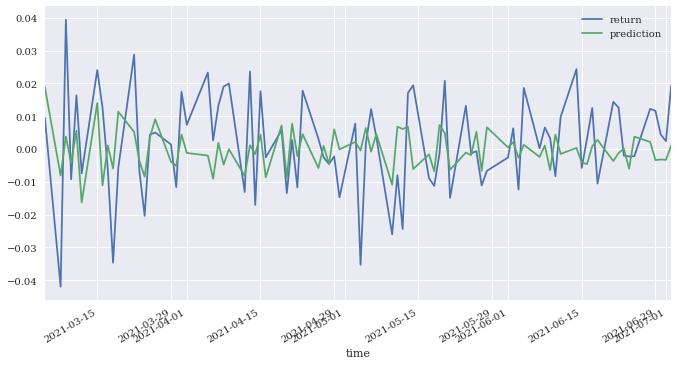

In [17]:
ticker[[ 'return', 'prediction']].iloc[lags:].plot(figsize=(10, 6))

In [18]:
hits = np.sign(ticker['return'] * ticker['prediction']).value_counts()

In [19]:
hits.values[0] / sum(hits)

0.5955056179775281

In [20]:
reg = np.linalg.lstsq(ticker[cols], np.sign(ticker['return']),  rcond=None)[0]
reg

array([-12.11688742,  -3.14071531,  -8.90431687,   9.55652976,
         2.42336065])

In [21]:
ticker['prediction'] = np.sign(np.dot(ticker[cols], reg))

In [22]:
ticker['prediction'].value_counts()

-1.0    48
 1.0    41
Name: prediction, dtype: int64

In [23]:
hits = np.sign(ticker['return'] * ticker['prediction']).value_counts()
hits

 1.0    52
-1.0    37
dtype: int64